In [2]:
import os
""" First change the following directory link to where all input files do exist """
#os.chdir("D:\\Book writing\\Codes\\Chapter 5")



import numpy as np
import pandas as pd

# KNN Curse of Dimensionality
import random,math

1 0.0011310312795327349 0.3304377974569266 0.003422826590169872
6 0.13408376385196982 0.9718366726979907 0.13796944241641917
11 0.6174961838009708 1.3428297800724869 0.4598469537722331
16 0.690723555518616 1.5916756747360146 0.43395998725253815
21 1.145299809744623 1.8606501665486392 0.6155374236034196
26 1.3491108338575342 2.05939278034058 0.655101273898037
31 1.5306814775223596 2.2575232751731726 0.6780357457909011
36 1.6495694595386121 2.4368760200852035 0.6769197308121306
41 1.8131615499536435 2.620080307069328 0.692025181465427
46 1.9887669978961435 2.7625945084356123 0.7198910270122604
51 2.079213166546753 2.89338869628594 0.7186083118440697
56 2.2542679491328115 3.04103478287079 0.7412831848653645
61 2.43171126047381 3.1837540168385114 0.7637874181273951
66 2.567853662815102 3.2946307081057804 0.7794056118330382
71 2.7064177084028915 3.4335738927751285 0.788221775013403
76 2.7550984355940185 3.5609023888328744 0.773707935447518
81 2.9832566405962075 3.6705963579722676 0.81274440

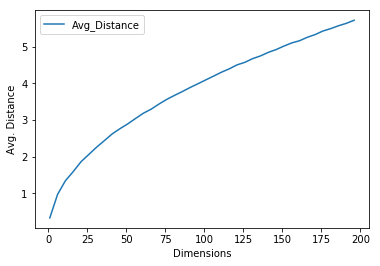

In [3]:
def random_point_gen(dimension):
    return [random.random() for _ in range(dimension)]

def distance(v,w):
    vec_sub = [v_i-w_i for v_i,w_i in zip(v,w)]
    sum_of_sqrs = sum(v_i*v_i for v_i in vec_sub)
    return math.sqrt(sum_of_sqrs)

def random_distances_comparison(dimension,number_pairs):
    return [distance(random_point_gen(dimension),random_point_gen(dimension))
            for _ in range(number_pairs)]

def mean(x):
    return sum(x) / len(x)

dimensions = range(1, 201, 5)

avg_distances = []
min_distances = []


dummyarray = np.empty((20,4))
dist_vals = pd.DataFrame(dummyarray)
dist_vals.columns = ["Dimension","Min_Distance","Avg_Distance","Min/Avg_Distance"]

random.seed(34)
i = 0
for dims in dimensions:
    distances = random_distances_comparison(dims, 1000)  
    avg_distances.append(mean(distances))    
    min_distances.append(min(distances))     
    
    dist_vals.loc[i,"Dimension"] = dims
    dist_vals.loc[i,"Min_Distance"] = min(distances)
    dist_vals.loc[i,"Avg_Distance"] = mean(distances)
    dist_vals.loc[i,"Min/Avg_Distance"] = min(distances)/mean(distances)
                 
    print(dims, min(distances), mean(distances), min(distances)*1.0 / mean(distances))
    i = i+1

# Ploting Average distances for Various Dimensions
import matplotlib.pyplot as plt
plt.figure()
#plt.title('Avg. Distance Change with Number of Dimensions for 1K Obs')
plt.xlabel('Dimensions')
plt.ylabel('Avg. Distance')
plt.plot(dist_vals["Dimension"],dist_vals["Avg_Distance"])
plt.legend(loc='best')
plt.show()

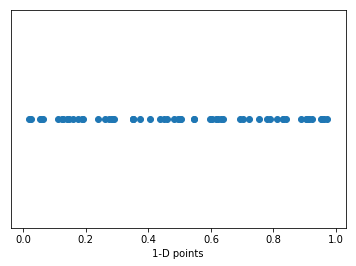

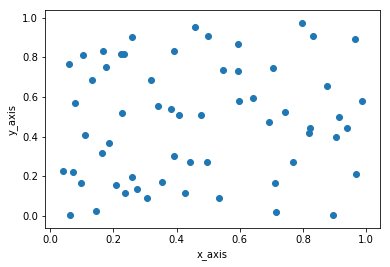

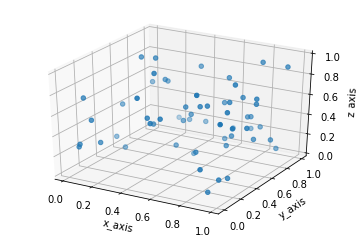

In [4]:
# 1-Dimension Plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

one_d_data = np.random.rand(60,1)
one_d_data_df = pd.DataFrame(one_d_data)
one_d_data_df.columns = ["1D_Data"]
one_d_data_df["height"] = 1

plt.figure()
plt.scatter(one_d_data_df['1D_Data'],one_d_data_df["height"])
plt.yticks([])
plt.xlabel("1-D points")
plt.show()

# 2- Dimensions Plot
two_d_data = np.random.rand(60,2)
two_d_data_df = pd.DataFrame(two_d_data)
two_d_data_df.columns = ["x_axis","y_axis"]

plt.figure()
plt.scatter(two_d_data_df['x_axis'],two_d_data_df["y_axis"])
plt.xlabel("x_axis");plt.ylabel("y_axis")
plt.show()

# 3- Dimensions Plot
three_d_data = np.random.rand(60,3)
three_d_data_df = pd.DataFrame(three_d_data)
three_d_data_df.columns = ["x_axis","y_axis","z_axis"]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(three_d_data_df['x_axis'],three_d_data_df["y_axis"],three_d_data_df["z_axis"])
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('z_axis')
plt.show()




In [16]:
# KNN Classifier - Breast Cancer 
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score,classification_report 
breast_cancer = pd.read_csv("Breast_Cancer_Wisconsin.csv") 

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(filename, names=names)

columns = ['Sample code number', [id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [17]:
breast_cancer.head(5)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [19]:
breast_cancer.columns[6] = Bare_Nucleoli

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

        id  clump_thickness  size_uniformity  shape_uniformity  \
0  1000025                5                1                 1   
1  1002945                5                4                 4   
2  1015425                3                1                 1   
3  1016277                6                8                 8   
4  1017023                4                1                 1   

   marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                  1                2             1                3   
1                  5                7            10                3   
2                  1                2             2                3   
3                  1                3             4                3   
4                  3                2             1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7    

C:\Anaconda3\envs\tensorflow2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)



K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          309    6
1            4  170

K-Nearest Neighbors - Train accuracy: 0.98

K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       0.99      0.98      0.98       315
          1       0.97      0.98      0.97       174

avg / total       0.98      0.98      0.98       489



K-Nearest Neighbors - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          141   2
1            3  64

K-Nearest Neighbors - Test accuracy: 0.976

K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.98      0.99      0.98       143
          1       0.97      0.96      0.96        67

avg / total       0.98      0.98      0.98       210


K-value 1

K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          315    0
1       

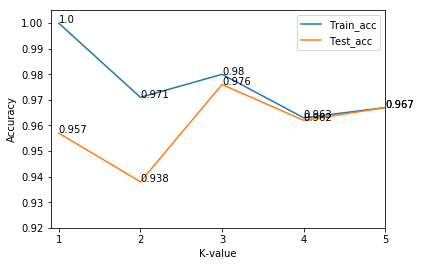

In [22]:
# KNN CLassifier - Breast Cancer
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report

breast_cancer = pd.read_csv("Breast_Cancer_Wisconsin.csv")

print (breast_cancer.head())

breast_cancer['bare_nucleoli'] = breast_cancer['bare_nucleoli'].replace('?', np.NAN)
breast_cancer['bare_nucleoli'] = breast_cancer['bare_nucleoli'].fillna(breast_cancer['bare_nucleoli'].value_counts().index[0])

breast_cancer['Cancer_Ind'] = 0
breast_cancer.loc[breast_cancer['class']==4,'Cancer_Ind'] = 1

x_vars = breast_cancer.drop(['id','class','Cancer_Ind'],axis=1)
y_var = breast_cancer['Cancer_Ind']


from sklearn.preprocessing import StandardScaler
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values)
from sklearn.model_selection import train_test_split
x_vars_stdscle_df = pd.DataFrame(x_vars_stdscle, index=x_vars.index, columns=x_vars.columns)
x_train,x_test,y_train,y_test = train_test_split(x_vars_stdscle_df,y_var,train_size = 0.7,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn_fit = KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
knn_fit.fit(x_train,y_train)

print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train,knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )     
print ("\nK-Nearest Neighbors - Train accuracy:",round(accuracy_score(y_train,knn_fit.predict(x_train)),3))
print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(x_train)))

print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test,knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nK-Nearest Neighbors - Test accuracy:",round(accuracy_score(y_test,knn_fit.predict(x_test)),3))
print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))


# Tuning of K- value for Train & Test data
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]

k_vals = [1,2,3,4,5]
for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(x_train,y_train)

    print ("\nK-value",k_vals[i])
    
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(x_train)),3)
    print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train,knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )     
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(x_train)))

    ts_accscore = round(accuracy_score(y_test,knn_fit.predict(x_test)),3)    
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test,knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))
    
    k_valchart.loc[i, 'K_value'] = k_vals[i]      
    k_valchart.loc[i, 'Train_acc'] = tr_accscore     
    k_valchart.loc[i, 'Test_acc'] = ts_accscore               


# Ploting accuracies over varied K-values
import matplotlib.pyplot as plt
plt.figure()
#plt.title('KNN Train & Test Accuracy change with K-value')

plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.plot(k_valchart["K_value"],k_valchart["Train_acc"])
plt.plot(k_valchart["K_value"],k_valchart["Test_acc"])

plt.axis([0.9,5, 0.92, 1.005])
plt.xticks([1,2,3,4,5])

for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)

for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
    
plt.legend(loc='upper right')    

plt.show()



In [ ]:




import os
""" First change the following directory link to where all input files do exist """
os.chdir("D:\\Book writing\\Codes\\Chapter 5")



import numpy as np
import pandas as pd

# KNN Curse of Dimensionality
import random,math

def random_point_gen(dimension):
    return [random.random() for _ in range(dimension)]

def distance(v,w):
    vec_sub = [v_i-w_i for v_i,w_i in zip(v,w)]
    sum_of_sqrs = sum(v_i*v_i for v_i in vec_sub)
    return math.sqrt(sum_of_sqrs)

def random_distances_comparison(dimension,number_pairs):
    return [distance(random_point_gen(dimension),random_point_gen(dimension))
            for _ in range(number_pairs)]

def mean(x):
    return sum(x) / len(x)

dimensions = range(1, 201, 5)

avg_distances = []
min_distances = []


dummyarray = np.empty((20,4))
dist_vals = pd.DataFrame(dummyarray)
dist_vals.columns = ["Dimension","Min_Distance","Avg_Distance","Min/Avg_Distance"]

random.seed(34)
i = 0
for dims in dimensions:
    distances = random_distances_comparison(dims, 1000)  
    avg_distances.append(mean(distances))    
    min_distances.append(min(distances))     
    
    dist_vals.loc[i,"Dimension"] = dims
    dist_vals.loc[i,"Min_Distance"] = min(distances)
    dist_vals.loc[i,"Avg_Distance"] = mean(distances)
    dist_vals.loc[i,"Min/Avg_Distance"] = min(distances)/mean(distances)
                 
    print(dims, min(distances), mean(distances), min(distances)*1.0 / mean(distances))
    i = i+1

# Ploting Average distances for Various Dimensions
import matplotlib.pyplot as plt
plt.figure()
#plt.title('Avg. Distance Change with Number of Dimensions for 1K Obs')
plt.xlabel('Dimensions')
plt.ylabel('Avg. Distance')
plt.plot(dist_vals["Dimension"],dist_vals["Avg_Distance"])
plt.legend(loc='best')
plt.show()



# 1-Dimension Plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

one_d_data = np.random.rand(60,1)
one_d_data_df = pd.DataFrame(one_d_data)
one_d_data_df.columns = ["1D_Data"]
one_d_data_df["height"] = 1

plt.figure()
plt.scatter(one_d_data_df['1D_Data'],one_d_data_df["height"])
plt.yticks([])
plt.xlabel("1-D points")
plt.show()

# 2- Dimensions Plot
two_d_data = np.random.rand(60,2)
two_d_data_df = pd.DataFrame(two_d_data)
two_d_data_df.columns = ["x_axis","y_axis"]

plt.figure()
plt.scatter(two_d_data_df['x_axis'],two_d_data_df["y_axis"])
plt.xlabel("x_axis");plt.ylabel("y_axis")
plt.show()

# 3- Dimensions Plot
three_d_data = np.random.rand(60,3)
three_d_data_df = pd.DataFrame(three_d_data)
three_d_data_df.columns = ["x_axis","y_axis","z_axis"]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(three_d_data_df['x_axis'],three_d_data_df["y_axis"],three_d_data_df["z_axis"])
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('z_axis')
plt.show()




# KNN CLassifier - Breast Cancer
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report

breast_cancer = pd.read_csv("Breast_Cancer_Wisconsin.csv")

print (breast_cancer.head())

breast_cancer['Bare_Nuclei'] = breast_cancer['Bare_Nuclei'].replace('?', np.NAN)
breast_cancer['Bare_Nuclei'] = breast_cancer['Bare_Nuclei'].fillna(breast_cancer['Bare_Nuclei'].value_counts().index[0])

breast_cancer['Cancer_Ind'] = 0
breast_cancer.loc[breast_cancer['Class']==4,'Cancer_Ind'] = 1

x_vars = breast_cancer.drop(['ID_Number','Class','Cancer_Ind'],axis=1)
y_var = breast_cancer['Cancer_Ind']


from sklearn.preprocessing import StandardScaler
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values)
from sklearn.model_selection import train_test_split
x_vars_stdscle_df = pd.DataFrame(x_vars_stdscle, index=x_vars.index, columns=x_vars.columns)
x_train,x_test,y_train,y_test = train_test_split(x_vars_stdscle_df,y_var,train_size = 0.7,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn_fit = KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')
knn_fit.fit(x_train,y_train)

print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train,knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )     
print ("\nK-Nearest Neighbors - Train accuracy:",round(accuracy_score(y_train,knn_fit.predict(x_train)),3))
print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(x_train)))

print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test,knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nK-Nearest Neighbors - Test accuracy:",round(accuracy_score(y_test,knn_fit.predict(x_test)),3))
print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))


# Tuning of K- value for Train & Test data
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]

k_vals = [1,2,3,4,5]
for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(x_train,y_train)

    print ("\nK-value",k_vals[i])
    
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(x_train)),3)
    print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train,knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )     
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(x_train)))

    ts_accscore = round(accuracy_score(y_test,knn_fit.predict(x_test)),3)    
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test,knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))
    
    k_valchart.loc[i, 'K_value'] = k_vals[i]      
    k_valchart.loc[i, 'Train_acc'] = tr_accscore     
    k_valchart.loc[i, 'Test_acc'] = ts_accscore               


# Ploting accuracies over varied K-values
import matplotlib.pyplot as plt
plt.figure()
#plt.title('KNN Train & Test Accuracy change with K-value')

plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.plot(k_valchart["K_value"],k_valchart["Train_acc"])
plt.plot(k_valchart["K_value"],k_valchart["Test_acc"])

plt.axis([0.9,5, 0.92, 1.005])
plt.xticks([1,2,3,4,5])

for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)

for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
    
plt.legend(loc='upper right')    

plt.show()





# Naive Bayes using NLP

# USe following code if it wont work in first place with UTF-8 code error

# import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

import csv

smsdata = open('SMSSpamCollection.txt','r')
csv_reader = csv.reader(smsdata,delimiter='\t')

smsdata_data = []
smsdata_labels = []

for line in csv_reader:
    smsdata_labels.append(line[0])
    smsdata_data.append(line[1])

smsdata.close()

# Printing top 5 lines
for i in range(5):
    print (smsdata_data[i],smsdata_labels[i])

# Printing Spam & Ham count
from collections import Counter
c = Counter( smsdata_labels )
print(c)


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from nltk import pos_tag
from nltk.stem import PorterStemmer

def preprocessing(text):
    text2 = " ".join("".join([" " if ch in string.punctuation else ch for ch in text]).split())

    tokens = [word for sent in nltk.sent_tokenize(text2) for word in
              nltk.word_tokenize(sent)]
    
    tokens = [word.lower() for word in tokens]
    
    stopwds = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwds]
    
    tokens = [word for word in tokens if len(word)>=3]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    tagged_corpus = pos_tag(tokens)    
    
    Noun_tags = ['NN','NNP','NNPS','NNS']
    Verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']

    lemmatizer = WordNetLemmatizer()

    def prat_lemmatize(token,tag):
        if tag in Noun_tags:
            return lemmatizer.lemmatize(token,'n')
        elif tag in Verb_tags:
            return lemmatizer.lemmatize(token,'v')
        else:
            return lemmatizer.lemmatize(token,'n')
    
    pre_proc_text =  " ".join([prat_lemmatize(token,tag) for token,tag in tagged_corpus])             

    return pre_proc_text


smsdata_data_2 = []

for i in smsdata_data:
    smsdata_data_2.append(preprocessing(i))


import numpy as np


trainset_size = int(round(len(smsdata_data_2)*0.70))


print ('The training set size for this classifier is ' + str(trainset_size) + '\n')

x_train = np.array([''.join(rec) for rec in smsdata_data_2[0:trainset_size]])
y_train = np.array([rec for rec in smsdata_labels[0:trainset_size]])
x_test = np.array([''.join(rec) for rec in smsdata_data_2[trainset_size+1:len(smsdata_data_2)]])
y_test = np.array([rec for rec in smsdata_labels[trainset_size+1:len(smsdata_labels)]])


# building TFIDF vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2),  stop_words='english', 
                             max_features= 4000,strip_accents='unicode',  norm='l2')

x_train_2 = vectorizer.fit_transform(x_train).todense()
x_test_2 = vectorizer.transform(x_test).todense()

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train_2, y_train)

ytrain_nb_predicted = clf.predict(x_train_2)
ytest_nb_predicted = clf.predict(x_test_2)

from sklearn.metrics import classification_report,accuracy_score

print ("\nNaive Bayes - Train Confusion Matrix\n\n",pd.crosstab(y_train,ytrain_nb_predicted,rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nNaive Bayes- Train accuracy",round(accuracy_score(y_train,ytrain_nb_predicted),3))
print ("\nNaive Bayes  - Train Classification Report\n",classification_report(y_train,ytrain_nb_predicted))

print ("\nNaive Bayes - Test Confusion Matrix\n\n",pd.crosstab(y_test,ytest_nb_predicted,rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nNaive Bayes- Test accuracy",round(accuracy_score(y_test,ytest_nb_predicted),3))
print ("\nNaive Bayes  - Test Classification Report\n",classification_report(y_test,ytest_nb_predicted))


# printing top features 
feature_names = vectorizer.get_feature_names()
coefs = clf.coef_
intercept = clf.intercept_
coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))

print ("\n\nTop 10 features - both first & last\n")
n=10
top_n_coefs = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top_n_coefs:
    print('\t%.4f\t%-15s\t\t%.4f\t%-15s' % (coef_1, fn_1, coef_2, fn_2))


